In [2]:
import torch
import torch.nn as nn
from torch import optim
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 数学场景：找到 f(x) = 0.05 * x1^2 + x2^2 的最小值
def f(X):
    return 0.05 * X[0]**2 + X[1]**2

In [30]:
# 定义一些超参数
lr, iter_num, gamma, step_size = 0.8, 500, 0.7, 30

# 定义初始点
X = torch.tensor([-7.0, 2.0], requires_grad=True)

In [31]:
# 定义优化器
optimizer = optim.SGD([X], lr=lr)
# 定义学习率衰减
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=step_size, gamma=gamma)


In [32]:
# 迭代过程
X_history, lr_history = [], []
for i in range(iter_num):
    X_history.append(X.detach().clone().numpy())
    lr_history.append(optimizer.param_groups[0]['lr'])

    # 前向传播
    y = f(X)

    # 反向传播
    y.backward()

    # 更新参数
    optimizer.step()
    # 更新学习率
    scheduler.step()

    # 清零梯度
    optimizer.zero_grad()
    


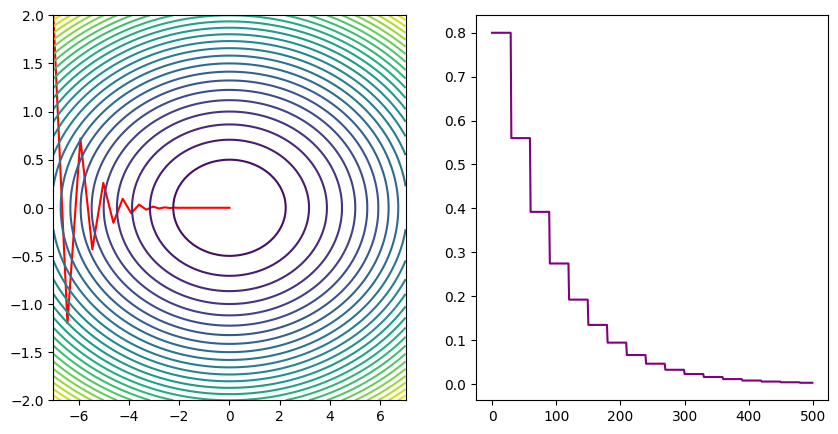

In [37]:
# 画图 一定要把list转换为numpy数组
from torch.onnx._internal.diagnostics import levels


X_history = np.array(X_history)
lr_history = np.array(lr_history)

fig, ax = plt.subplots(figsize=(10, 5), nrows=1, ncols=2)

# 等高线
x_grid, y_grid = np.meshgrid(np.linspace(-7, 7, 100), np.linspace(-2, 2, 100))

Y = 0.05 * x_grid ** 2 + y_grid ** 2

# 子图1，优化过程
ax[0].plot(X_history[:, 0], X_history[:, 1], 'r')
ax[0].contour(x_grid, y_grid, Y, levels=30)

# 子图2，lr 衰减过程
ax[1].plot(np.arange(iter_num), lr_history, color='purple')